### MLP for analytes classification on binned data using Keras
#### Edgar Acuna
#### June 2020

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

In [2]:
#loading the data
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)

In [3]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)

In [4]:
#Creating the binned dataset
binned=np.zeros((18000,567))  
for j in range(18000):
    tempo=dfset1.iloc[j,:]
    for i in range (0,1701,3):
        k=int(i/3) 
        mean=(tempo[i] + tempo[i+1] + tempo[i+2])/3
        binned[j,k]=mean
b=pd.DataFrame(binned)


In [5]:
# Configuration options
feature_vector_length = 567
num_classes = 18000

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(b,y, test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Train dimension:
(12600, 567)
Test dimension:
(5400, 567)


In [7]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.2, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (567,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 567)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               227200    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_2 (Dense)              (None, 18000)             918000    
Total params: 1,165,250
Trainable params: 1,165,250
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
202/202 [==============================] - 4s 16ms/step - loss: 5.8246 - accuracy: 0.0244 - val_loss: 3.8004 - val_accuracy: 0.0250
Epoch 2/100
202/202 [==============================] - 2s 12ms/step - loss: 3.7680 - accuracy: 0.0249 - val_loss: 3.6950 - val_accuracy: 0.0258
Epoch 3/100
202/202 [==============================] - 2s 12ms/step - loss: 3.7001 - accuracy: 0.0275 - val_loss: 3.6880 - val_accuracy: 0.0218
Epoch 4/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6889 - accuracy: 0.0281 - val_loss: 3.6883 - val_accuracy: 0.0401
Epoch 5/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6809 - accuracy: 0.0325 - val_loss: 3.6632 - val_accuracy: 0.0373
Epoch 6/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6660 - accuracy: 0.0370 - val_loss: 3.6199 - val_accuracy: 0.0385
Epoch 7/100
202/202 [==============================] - 2s 12ms/step - loss: 3.6127 - accuracy: 0.0490 - val_loss: 3.5230 - val_accuracy:

202/202 [==============================] - 3s 14ms/step - loss: 2.2763 - accuracy: 0.3733 - val_loss: 1.9270 - val_accuracy: 0.5171
Epoch 58/100
202/202 [==============================] - 3s 14ms/step - loss: 2.2871 - accuracy: 0.3785 - val_loss: 1.8540 - val_accuracy: 0.5607
Epoch 59/100
202/202 [==============================] - 3s 14ms/step - loss: 2.2769 - accuracy: 0.3841 - val_loss: 1.8681 - val_accuracy: 0.5254
Epoch 60/100
202/202 [==============================] - 3s 15ms/step - loss: 2.2942 - accuracy: 0.3743 - val_loss: 1.8510 - val_accuracy: 0.5794
Epoch 61/100
202/202 [==============================] - 3s 14ms/step - loss: 2.2594 - accuracy: 0.3852 - val_loss: 1.8676 - val_accuracy: 0.5520
Epoch 62/100
202/202 [==============================] - 3s 14ms/step - loss: 2.2709 - accuracy: 0.3875 - val_loss: 1.8649 - val_accuracy: 0.5381
Epoch 63/100
202/202 [==============================] - 3s 15ms/step - loss: 2.2657 - accuracy: 0.3791 - val_loss: 1.8291 - val_accuracy: 0.550

In [9]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

169/169 [==============================] - 1s 8ms/step - loss: 1.8073 - accuracy: 0.5720
[1.8073185682296753, 0.5720370411872864]
Test results - Loss: 1.8073185682296753 - Accuracy: 0.5720370411872864%


### 2.  Classification of the first analyte

In [10]:
labels=list(range(1,41))

In [11]:
yclass=y.copy()
yclass[yclass!=1]=0
X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 567)
Test dimension:
(5400, 567)


In [12]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.3, input_shape=input_shape))
model.add(Dense(400, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (567,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 567)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               227200    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_5 (Dense)              (None, 18000)             918000    
Total params: 1,165,250
Trainable params: 1,165,250
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/50
101/101 [==============================] - 6s 51ms/step - loss: 4.4346 - accuracy: 1.0000 - precision: 0.8777 - recall: 0.4296 - val_loss: 0.3672 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9587
Epoch 2/50
101/101 [==============================] - 5s 47ms/step - loss: 0.2748 - accuracy: 1.0000 - precision: 0.9779 - recall: 0.9670 - val_loss: 0.3083 - val_accuracy: 1.0000 - val_precision: 0.9717 - val_recall: 0.9683
Epoch 3/50
101/101 [==============================] - 5s 47ms/step - loss: 0.2597 - accuracy: 1.0000 - precision: 0.9752 - recall: 0.9722 - val_loss: 0.2675 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 4/50
101/101 [==============================] - 5s 47ms/step - loss: 0.2233 - accuracy: 1.0000 - precision: 0.9764 - recall: 0.9764 - val_loss: 0.2530 - val_accuracy: 1.0000 - val_precision: 0.9718 - val_recall: 0.9718
Epoch 5/50
101/101 [==============================] - 4s 43ms/step - loss: 0.1852 - accuracy: 1.0000

101/101 [==============================] - 4s 36ms/step - loss: 0.0830 - accuracy: 1.0000 - precision: 0.9801 - recall: 0.9801 - val_loss: 0.0854 - val_accuracy: 1.0000 - val_precision: 0.9778 - val_recall: 0.9778
Epoch 38/50
101/101 [==============================] - 4s 37ms/step - loss: 0.0834 - accuracy: 1.0000 - precision: 0.9789 - recall: 0.9789 - val_loss: 0.0805 - val_accuracy: 1.0000 - val_precision: 0.9770 - val_recall: 0.9770
Epoch 39/50
101/101 [==============================] - 4s 36ms/step - loss: 0.0805 - accuracy: 1.0000 - precision: 0.9814 - recall: 0.9813 - val_loss: 0.0888 - val_accuracy: 1.0000 - val_precision: 0.9770 - val_recall: 0.9770: 0.0788 - accuracy: 1.0000 - prec
Epoch 40/50
101/101 [==============================] - 4s 36ms/step - loss: 0.0766 - accuracy: 1.0000 - precision: 0.9807 - recall: 0.9807 - val_loss: 0.1048 - val_accuracy: 1.0000 - val_precision: 0.9754 - val_recall: 0.9754
Epoch 41/50
101/101 [==============================] - 4s 36ms/step - loss

In [14]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

169/169 [==============================] - 1s 9ms/step - loss: 0.0650 - accuracy: 1.0000 - precision: 0.9802 - recall: 0.9802
Test results - Loss: 0.06502241641283035 - Accuracy: 0.9999987483024597% -Precision: 0.9801852107048035% -Recall: 0.9801852107048035%


In [15]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy','precision','recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

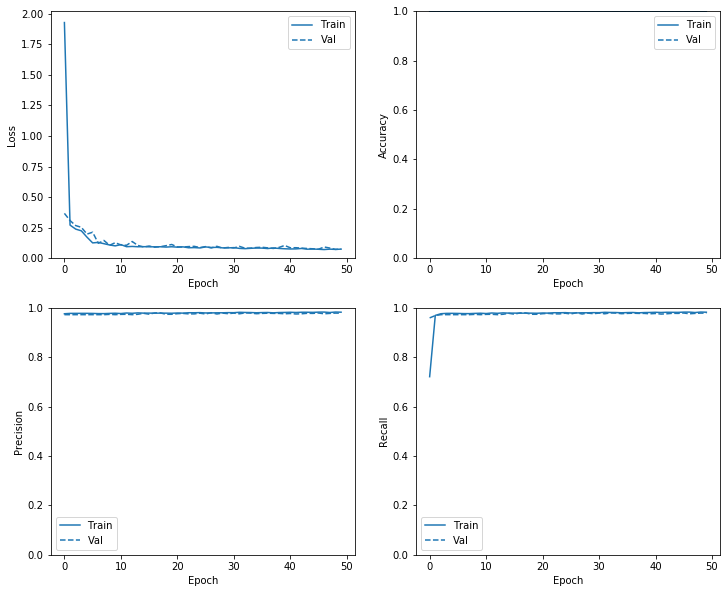

In [16]:
plot_metrics(baseline_history)

In [17]:
a=model.predict_classes(X_train,batch_size=200)

C:\Users\eacun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

C:\Users\eacun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


f1_scores, training set [0.99077617 0.38605898] f1_scores in testing set [0.98991422 0.43979058]


In [19]:
#The ROC curve
fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
roc_auc = sklearn.metrics.auc(fp,tp)
roc_auc1 = sklearn.metrics.auc(fp1,tp1)

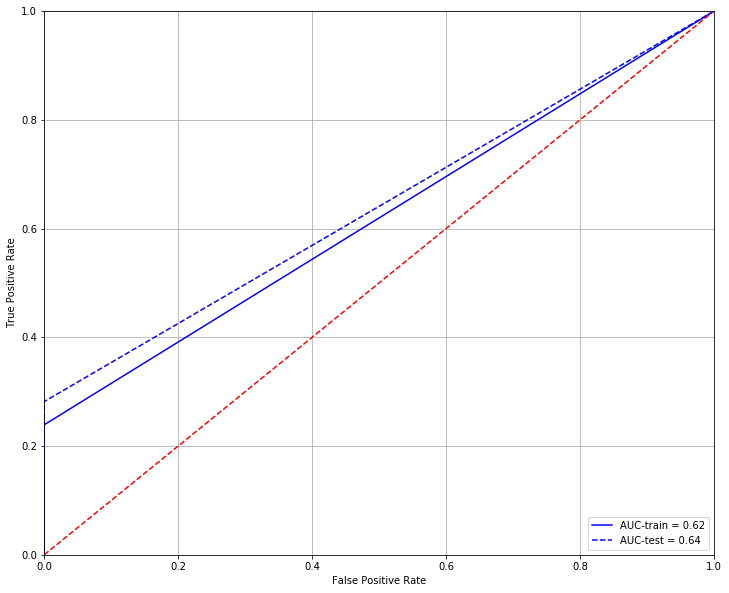

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()